In [2]:
import numpy as np
from hugalaxy import GalaxyWrapper, calculate_mass, plotRotationCurve, density_wrapper

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift = M33_Distance / (Radius_Universe_4D - M33_Distance)
nr = 300
nz = 100
ntheta = 180
nr_sampling = 103
nz_sampling = 104
R_max = 50000.0
# x0 = [1.844837e+01,4.740177e-04,1.457439e-01,2.269586e-05,1.360023e+05]
x0 =  [17.893718222852044, 0.00047066801240602216, 0.1462822060787215, 2.1683777520902726e-05, 138317.8152412921]
rho_0, alpha_0, rho_1, alpha_1, h0 = x0
GalaxyMass = 5E10
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, nr_sampling, nz_sampling, ntheta, redshift,GPU_ID=0, cuda=True)

# M33.getGPU_ID()
# M33.getCuda()
# M33.setCuda(True)
M33.read_galaxy_rotation_curve(m33_rotational_curve)
v_sim = M33.simulate_rotation_curve()
M33.print_density_parameters()

CUDA STATUS 1
Total Error = 101.738
Total Error = 20306.7
Total Error = 21631.3
Total Error = 5001.49
Total Error = 1281.78
Total Error = 101.738
Total Error = 1.37764e+07
Total Error = 7552.2
Total Error = 43915.6
Total Error = 3967.37
Total Error = 101159
Total Error = 2031.27
Total Error = 7463.85
Total Error = 1069.75
Total Error = 9185.49
Total Error = 862.714
Total Error = 8497.13
Total Error = 591.725
Total Error = 5226.3
Total Error = 402.697
Total Error = 1824.62
Total Error = 294.909
Total Error = 1630.73
Total Error = 266.189
Total Error = 1379.82
Total Error = 212.639
Total Error = 738.847
Total Error = 180.361
Total Error = 500.645
Total Error = 141.418
Total Error = 353.5
Total Error = 144.832
Total Error = 341.234
Total Error = 127.466
Total Error = 184.341
Total Error = 126.806
Total Error = 123.9
Total Error = 258.555
Total Error = 105.042
Total Error = 110.441
Total Error = 110.82
Total Error = 163.527
Total Error = 101.8
Total Error = 126.31
Total Error = 100.707
Tot

[17.794017793214294,
 0.00047088016471155214,
 0.1488318384623716,
 2.175613405322834e-05,
 139181.4767794332]

4368
Total Error = 98.4837
Total Error = 98.4415
Total Error = 98.4664
Total Error = 98.4325
Total Error = 98.4709
Total Error = 98.4312
Total Error = 98.4756
Total Error = 98.4277
Total Error = 98.452
Total Error = 98.4281
Total Error = 98.4358
Total Error = 98.4593
Total Error = 98.4257
Total Error = 98.4371
Total Error = 98.4275
Total Error = 98.4294
Total Error = 98.4272
Total Error = 98.4371
Total Error = 98.4245
Total Error = 98.4422
Total Error = 98.4239
Total Error = 98.4237
Total Error = 98.427
Total Error = 98.4289
Total Error = 98.4244
Total Error = 98.4277
Total Error = 98.4244
Total Error = 98.4245
Total Error = 98.4229
Total Error = 98.4239
Total Error = 98.4267
Total Error = 98.4232
Total Error = 98.4235
Total Error = 98.4249
Total Error = 98.4232
Total Error = 98.4232
Total Error = 98.4227
Total Error = 98.4237
Total Error = 98.4243
Total Error = 98.4228
Total Error = 98.4221
Total Error = 98.4217
Total Error = 98.424
Total Error = 98.4225
Total Error = 98.4229
Total Er

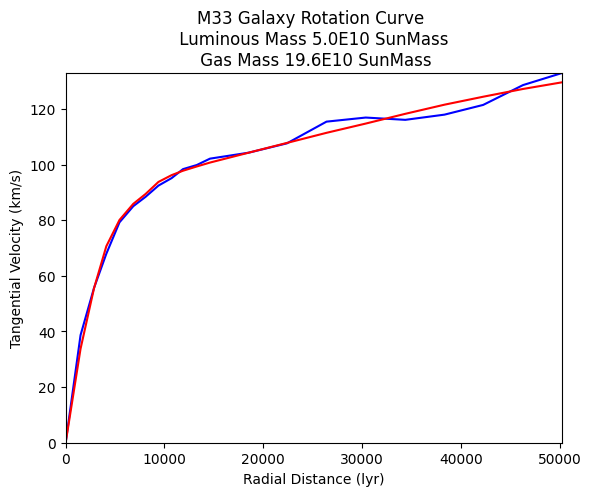

In [3]:
plotRotationCurve(M33)

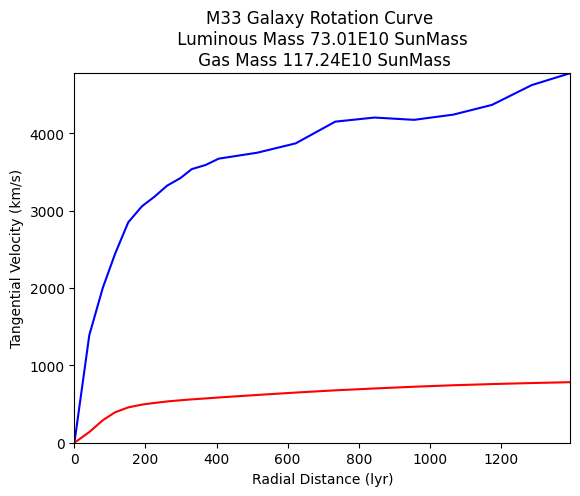

In [10]:
newz=5
old_redshift = M33.redshift
old_r = M33.r
old_rotation_curve = M33.rotation_curve
old_alpha_0 = M33.alpha_0
old_alpha_1 = M33.alpha_1
old_h0 = M33.h0
x0_in =np.array([M33.rho_0, old_alpha_0, M33.rho_1, old_alpha_1, old_h0])
rescalingFactor = (1+newz)/(1+old_redshift)
M33.alpha_0=old_alpha_0 *rescalingFactor
M33.alpha_1=old_alpha_1 * rescalingFactor
M33.h0 = old_h0 * rescalingFactor**2
M33.r = old_r/rescalingFactor
M33.rotation_curve=np.array([old_rotation_curve[0,:]/rescalingFactor,old_rotation_curve[1,:]*rescalingFactor])
plotRotationCurve(M33)



In [ ]:
for i in np.arange(5):
    v_sim = M33.simulate_rotation_curve()

M33.print_density_parameters()

In [11]:
x0_out = np.array(M33.print_density_parameters())
print( x0_out/x0_in)

[ 1.          5.9986315   1.          5.9986315  35.98357992]


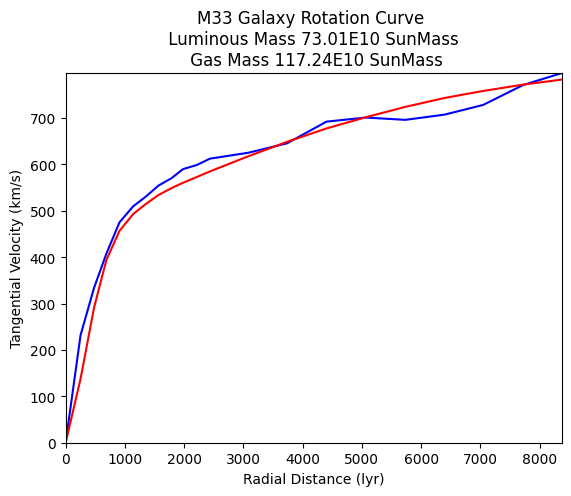

In [7]:
plotRotationCurve(M33)

In [ ]:
M33.alpha_0=old_alpha_0
M33.alpha_1=old_alpha_1 
M33.h0 = old_h0 
M33.r = old_r
M33.rotation_curve=np.array([old_rotation_curve[0,:],old_rotation_curve[1,:]])
plotRotationCurve(M33)

In [ ]:
# initial guesses for the rescaled rotation curve at a different epoch defined by redshift newz
x0 = np.array([M33.rho_0, alpha_0, M33.rho_1, alpha_1, h0])
# rescaling rotational curve and r
M33.r = M33.r/rescalingFactor
rotation_curve_x = M33.rotation_curve[0,:]/rescalingFactor
rotation_curve_v = M33.rotation_curve[1,:]*rescalingFactor
M33.rotation_curve = np.array([[M33.rotation_curve[0,:]/rescalingFactor],[M33.rotation_curve[1,:]/rescalingFactor]])
plotRotationCurve(M33)

In [ ]:
M33.rotation_curve

In [ ]:



M33.r = old_r
M33.rotation_curve = old_rotation_curve
M33.alpha_0 = old_alpha_0
M33.alpha_1 = old_alpha_1
M33.redshift = old_redshift

In [ ]:
M33.rotation_curve, old_rotation_curve[0,:]

In [ ]:
def stretch_space(M33, newz):
    old_redshift = M33.redshift
    old_r = M33.r
    old_rotation_curve = M33.rotation_curve
    old_alpha_0 = M33.alpha_0
    old_alpha_1 = M33.alpha_1
    old_h0 = M33.h0
    rescalingFactor = (1+newz)/(1+old_redshift)
    alpha_0=M33.alpha_0 *rescalingFactor
    alpha_1=M33.alpha_1 * rescalingFactor
    h0 = M33.h0 * rescalingFactor
    # initial guesses for the rescaled rotation curve at a different epoch defined by redshift newz
    x0 = np.array([M33.rho_0, alpha_0, M33.rho_1, alpha_1, h0])
    # rescaling rotational curve and r
    M33.r = M33.r/rescalingFactor
    rotation_curve_x = M33.rotation_curve[:,0]/rescalingFactor
    rotation_curve_v = M33.rotation_curve[:,1]*rescalingFactor
    M33.rotation_curve = np.array([rotation_curve_x,rotation_curve_v])
    plotRotationCurve(M33)
    M33.r = old_r
    M33.rotation_curve = old_rotation_curve
    M33.alpha_0 = old_alpha_0
    M33.alpha_1 = old_alpha_1
    M33.redshift = old_redshift

stretch_space(M33, newz=5)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(M33.rotation_curve[0,:], M33.rotation_curve[1,:])
plt.show()

In [ ]:
# initial guesses for the rescaled rotation curve at a different epoch defined by redshift newz
x0 = np.array([M33.rho_0, alpha_0, M33.rho_1, alpha_1, h0])
# rescaling rotational curve and r
M33.r = M33.r/rescalingFactor
rotation_curve_x = M33.rotation_curve[:,0]/rescalingFactor
rotation_curve_v = M33.rotation_curve[:,1]*rescalingFactor
M33.rotation_curve = np.array([rotation_curve_x,rotation_curve_v])
plotRotationCurve(M33)

In [ ]:
v_sim = M33.simulate_rotation_curve()
M33.print_density_parameters()


In [ ]:
def simulatedRescaledRotationCurve(newz, M33):
    # rescaling already optimized factors
    oldz = M33.redshift
    rescalingFactor = (1+newz)/(1+oldz)
    alpha_0=M33.alpha_0 *rescalingFactor
    alpha_1=M33.alpha_1 * rescalingFactor
    h0 = M33.h0 * rescalingFactor
    # initial guesses for the rescaled rotation curve at a different epoch defined by redshift newz
    x0 = [M33.rho_0, alpha_0, M33.rho_1, alpha_1, h0]
    # rescaling rotational curve and r
    M33.set_r( np.array(M33.r / rescalingFactor) )
    rotation_curve =np.array(M33.print_rotation_curve())
    rotation_curve[:,0] = 
    M33.set_rotation_curve(rotation_curve)
    
    

In [ ]:
hugalaxy.__dir__()

In [ ]:
epoch=100E6
time_step_years = 10E6
eta = 1/100
temperature =7
for i in np.arange(11):
    current_masses = M33.DrudePropagator( redshift,  time_step_years,  eta,  temperature)
    epoch += time_step_years


In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# r is of shape [5, 1, 1]
r = torch.randn(5, 1, 1)

# r_sampling_ii is a scalar
r_sampling_ii = torch.tensor(0.5)

# mask will have shape [5, 1, 1]
mask = r < r_sampling_ii

# commonfactor is of shape [5, 4, 3]
commonfactor = torch.randn(5, 4, 3)


# mask_broad will be broadcasted to the shape of commonfactor [5, 4, 3]
mask_broad = mask * commonfactor


# Convert the tensor to a NumPy array
mask_broad_np = mask_broad.numpy()

# Get the indices where mask is True
x, y, z = np.where(mask_broad_np)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z)
plt.show()

In [ ]:
x

In [ ]:
y

In [ ]:
z

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the tensor
mask = torch.load("cmake-build-debug/testCPPLibrary/mask_double.pt")

# Convert the tensor to a NumPy array
mask_np = mask.numpy()

# Get the indices where mask is True
x, y, z = np.where(mask_np)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(x, y, z)
plt.show()
